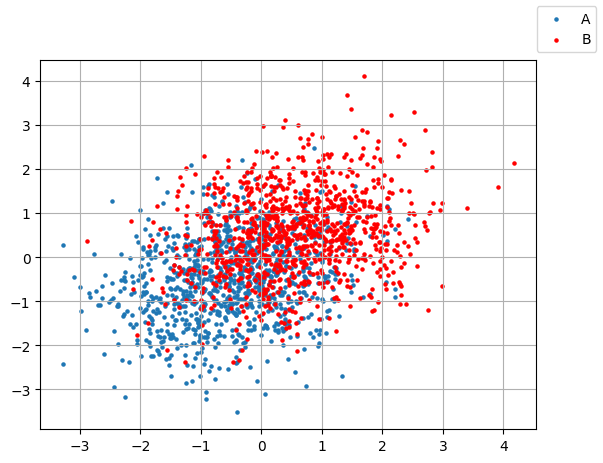

In [69]:
import torch
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal
bivariateNormalDistribution1 = MultivariateNormal(torch.tensor([-0.5,-0.5]),torch.tensor([[1, 0.25],[0.25, 1]]))
bivariateNormalDistribution2 = MultivariateNormal(torch.tensor([0.5,0.5]),torch.tensor([[1, 0.25],[0.25, 1]]))
A = bivariateNormalDistribution1.sample((1000,))
B = bivariateNormalDistribution2.sample((1000,))
plt.scatter(A[:,0], A[:,1], s=5)
plt.scatter(B[:,0], B[:,1], s=5, c='red')
X = torch.cat((A,B), dim=0)
plt.figlegend(['A','B'])
plt.grid(True)

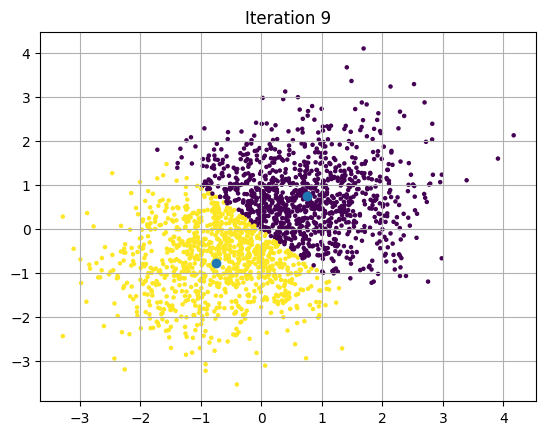

In [70]:
from IPython.display import clear_output
def random_centroids(data, k):
    centroids = torch.empty(k,2)
    for i in range(k):
        centroids[i] = torch.Tensor(data[torch.randint(data.size(0),(1,))])[0]
    return centroids
def get_labels(data, centroids):
    distances = torch.cdist(data, centroids)
    return torch.argmin(distances, dim=1)
def new_centroids(data, labels, k):
    new_centroids = torch.empty(k,2)
    for i in range(k):
        new_centroids[i] = data[labels == i].mean(axis=0)
    return new_centroids
def plot_clusters(data, labels, centroids, iteration):
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:,0], y=data[:,1], s=5, c=labels)
    plt.scatter(x=centroids[:,0], y=centroids[:,1])
    plt.grid(True)
    plt.show()
max_iterations = 100
k = 2
centroids = random_centroids(X,k)
old_centroids = torch.empty(k,2)
iteration = 1
while iteration < max_iterations and not torch.equal(centroids,old_centroids):
    old_centroids = centroids
    labels = get_labels(X, centroids)
    centroids = new_centroids(X, labels, k)
    plot_clusters(X, labels, centroids, iteration)
    iteration += 1

principal components by hand: 
tensor([[-0.2010,  0.4920, -0.1612,  0.8316],
        [ 0.1451,  0.7968, -0.3119, -0.4968],
        [-0.8914, -0.1213, -0.3788, -0.2171],
        [-0.3793,  0.3292,  0.8563, -0.1205]])


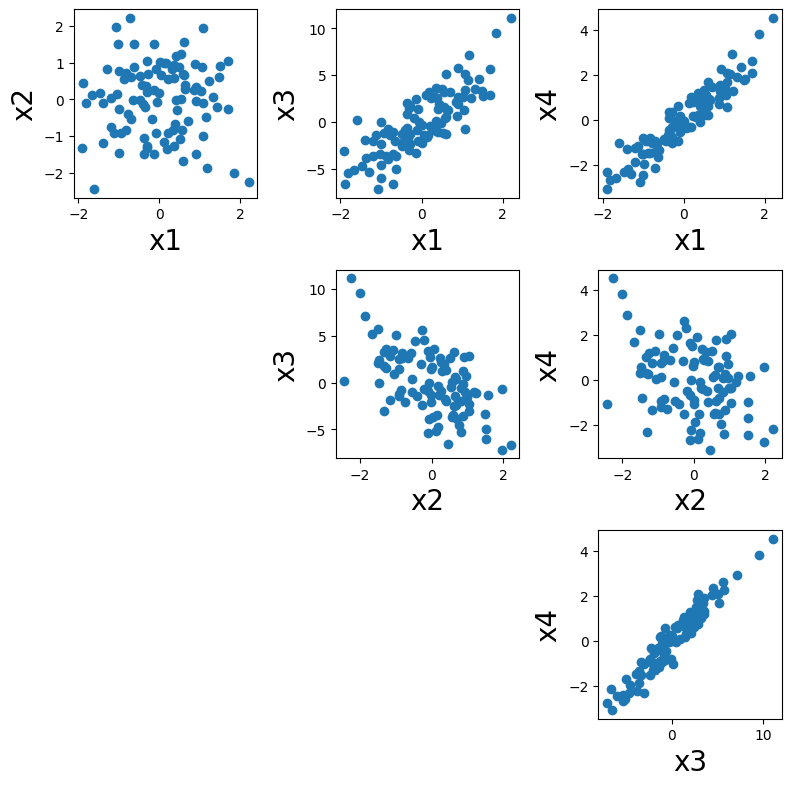

In [85]:
X = torch.normal(0,1,(100,4))
X[:,2] = 3 * X[:,0] -2 * X[:,1] + torch.normal(0.0, 0.1,(100,))
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + torch.normal(0.0, 0.1,(100,))
X = X - X.mean(axis=0)
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j>i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:, j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
ordering = torch.argsort(eigenvalues, descending=True)
principal_comps_byhand = eigenvectors[:,ordering]
print(f'principal components by hand: \n{principal_comps_byhand}')

In [88]:
# compare to output of built in PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
principal_comps_builtin = pca.components_.T
print(f'principal components built in: \n{principal_comps_builtin}')
# note sign does not matter

principal components built in: 
[[ 0.20101821  0.49204498 -0.161113    0.83158043]
 [-0.14513196  0.79676667 -0.31191994 -0.49679527]
 [ 0.89143167 -0.1212946  -0.37881507 -0.21710904]
 [ 0.37931249  0.32915381  0.85629884 -0.12054916]]
